# excel 데이터를 이용한 리포트 만들기

# 1. excel 데이터 가져오기/ 데이터프레임으로 데이터 생성하기

In [1]:
import pandas as pd
# http://opendata.kwater.or.kr/pubdata/rwiswater/water_level.do?seq_no=130
input_file = "/Users/kim/Downloads/실시간 수도정보 수위(시간)2018-04-27.xlsx"

In [2]:
data_frame = pd.read_excel(input_file, sheetname='1시간 수위')
print(data_frame.head(6))

/anaconda/lib/python3.6/site-packages/pandas/util/_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


         발생일시    시설명      시설관리번호      유량 단위       자료 수집 TAG 설명  태그SN 데이터항목구분  \
0  2018040101  반월정수장  4127112311  2.7468  m  반월(정) 2단계 정수지 수위1  4285       M   
1  2018040101  반월정수장  4127112311  2.6904  m  반월(정) 2단계 정수지 수위2  4287       M   
2  2018040101  반월정수장  4127112311  2.1149  m   반월(정) 3단계 정수지 수위  4288       M   
3  2018040102  반월정수장  4127112311  2.4917  m  반월(정) 2단계 정수지 수위1  4285       M   
4  2018040102  반월정수장  4127112311  2.2865  m  반월(정) 2단계 정수지 수위2  4287       M   
5  2018040102  반월정수장  4127112311  2.0885  m   반월(정) 3단계 정수지 수위  4288       M   

   변경일자  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  
5   NaN  


# 2. 시각화 하기(발생일자 기준 유량 Trand)

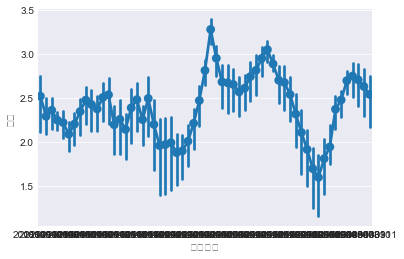

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#ax = sns.pointplot(x="발생일시", y="유량", data=data_frame)
ax = sns.pointplot(x="발생일시", y="유량", data=data_frame[data_frame['발생일시'] < 2018040312])
plt.show()

# 2-1. 시각화 하기(그룹으로 Trand 생성)

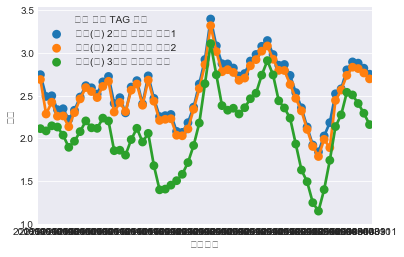

In [6]:
#ax = sns.pointplot(x="발생일시", y="유량", hue="자료 수집 TAG 설명", data=data_frame)
ax = sns.pointplot(x="발생일시", y="유량", hue="자료 수집 TAG 설명", data=data_frame[data_frame['발생일시'] < 2018040312])

# 3. 데이터 가공(Summary) - 발생일시로 Groupping

In [8]:
data_sum = data_frame['발생일시'].sum()
data_sum = pd.DataFrame(data_frame.groupby(['발생일시'])['유량'].mean())
print(data_sum.head(6))
#ax = sns.pointplot(x="발생일시", y="유량", data=data_sum)
print(data_sum.columns)
# 필요한 컬럼 필터
data_sum = data_frame.loc[:,['자료 수집 TAG 설명','발생일시','유량']]
# 발생일 생성
data_sum['발생일'] = data_sum['발생일시'].astype(str).str.slice(0, 8)
# 데이터 Sumamry 
data_sum = data_sum.groupby(['자료 수집 TAG 설명','발생일'])['유량'].mean().reset_index()


                  유량
발생일시                
2018040101  2.517367
2018040102  2.288900
2018040103  2.357467
2018040104  2.243867
2018040105  2.216667
2018040106  2.085500
Index(['유량'], dtype='object')


# 4. 시각화 하기

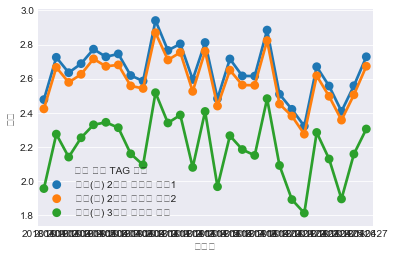

In [9]:
#data_sum = pd.Series(data_sum, index=cols)
ax = sns.pointplot(x="발생일", y="유량",hue="자료 수집 TAG 설명", data=data_sum)
